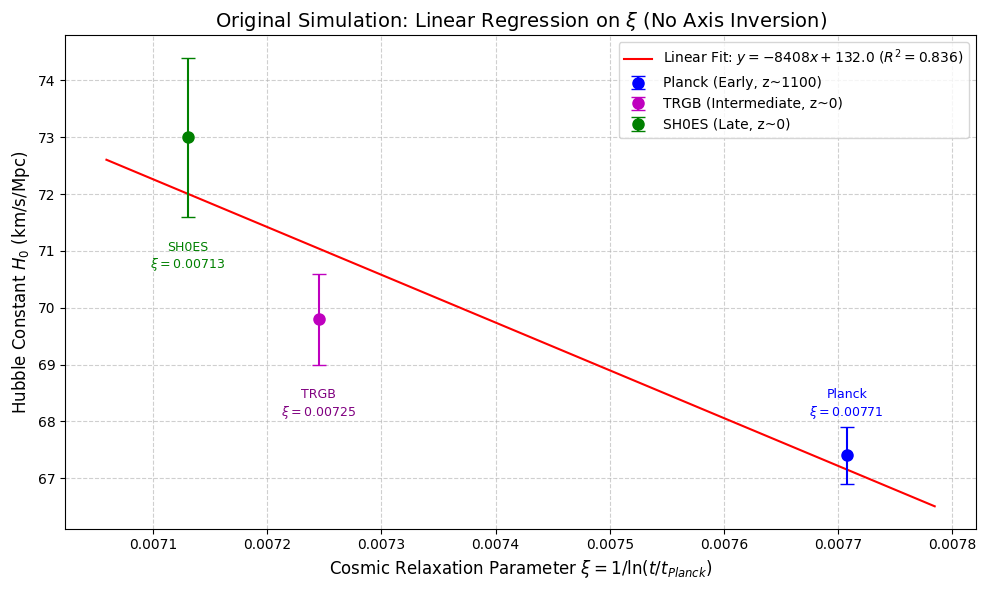

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Constants
t_planck_const = 5.39e-44
sec_per_year = 3.1536e7

# Data Points
# 1. Planck (Early)
t_planck_yr = 380000
H_planck = 67.4
H_planck_err = 0.5
xi_planck = 1 / np.log((t_planck_yr * sec_per_year) / t_planck_const)

# 2. SH0ES (Late)
t_shoes_yr = 13.8e9
H_shoes = 73.0
H_shoes_err = 1.4
xi_shoes = 1 / np.log((t_shoes_yr * sec_per_year) / t_planck_const)

# 3. TRGB (Intermediate)
t_trgb_yr = 1.5e9
H_trgb = 69.8
H_trgb_err = 0.8
xi_trgb = 1 / np.log((t_trgb_yr * sec_per_year) / t_planck_const)

# Data arrays
X = np.array([[xi_planck], [xi_trgb], [xi_shoes]])
y = np.array([H_planck, H_trgb, H_shoes])
y_err = np.array([H_planck_err, H_trgb_err, H_shoes_err])

# Fit (Unweighted as requested in latest context)
reg = LinearRegression().fit(X, y)
slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

# Predictions for plotting
xi_plot = np.linspace(min(X)*0.99, max(X)*1.01, 100).reshape(-1, 1)
H_plot = reg.predict(xi_plot)

# Plotting
plt.figure(figsize=(10, 6))

# Plot fit line
plt.plot(xi_plot, H_plot, 'r-', label=f'Linear Fit: $y = {slope:.0f}x + {intercept:.1f}$ ($R^2={r2:.3f}$)')

# Plot data points
plt.errorbar(xi_planck, H_planck, yerr=H_planck_err, fmt='bo', label='Planck (Early, z~1100)', markersize=8, capsize=5)
plt.errorbar(xi_trgb, H_trgb, yerr=H_trgb_err, fmt='mo', label='TRGB (Intermediate, z~0)', markersize=8, capsize=5)
plt.errorbar(xi_shoes, H_shoes, yerr=H_shoes_err, fmt='go', label='SH0ES (Late, z~0)', markersize=8, capsize=5)

# Annotations (No time direction arrow, just raw data)
plt.text(xi_planck, H_planck + 0.7, f'Planck\n$\\xi={xi_planck:.5f}$', ha='center', color='blue', fontsize=9)
plt.text(xi_trgb, H_trgb - 1.7, f'TRGB\n$\\xi={xi_trgb:.5f}$', ha='center', color='purple', fontsize=9)
plt.text(xi_shoes, H_shoes - 2.3, f'SH0ES\n$\\xi={xi_shoes:.5f}$', ha='center', color='green', fontsize=9)

# Labels
plt.xlabel(r'Cosmic Relaxation Parameter $\xi = 1/\ln(t/t_{Planck})$', fontsize=12)
plt.ylabel(r'Hubble Constant $H_0$ (km/s/Mpc)', fontsize=12)
plt.title(r'Original Simulation: Linear Regression on $\xi$ (No Axis Inversion)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Standard x-axis: Small xi (Left) -> Large xi (Right)
# This means: Late Universe (Left) -> Early Universe (Right)
plt.tight_layout()
plt.savefig('wang_hubble_original_fit.png', dpi=300)
plt.show()